In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

### 训练集数据勘察

In [2]:
train_former = open("train.former.txt", encoding="utf-8")
train_latter = open("train.latter.txt", encoding="utf-8")
valid_former = open("valid.former.txt", encoding="utf-8")
valid_latter = open("valid.latter.txt", encoding="utf-8")

In [3]:
former_len_dict = dict()
latter_len_dict = dict()
word_count = dict()

In [4]:
from tqdm import tqdm

In [5]:
for sen in tqdm(train_former.readlines(), leave=True, desc="训练集文本"):
    if len(sen) not in former_len_dict:
        former_len_dict[len(sen)] = 1
    else:
        former_len_dict[len(sen)] += 1
    for w in sen:
        if w not in word_count:
            word_count[w] = 1
        else:
            word_count[w] += 1
        
for sen in tqdm(valid_former.readlines(), leave=True, desc="验证集文本"):
    if len(sen) not in former_len_dict:
        former_len_dict[len(sen)] = 1
    else:
        former_len_dict[len(sen)] += 1
    for w in sen:
        if w not in word_count:
            word_count[w] = 1
        else:
            word_count[w] += 1
        
for sen in tqdm(train_latter.readlines(), leave=True, desc="训练集摘要"):
    if len(sen) not in latter_len_dict:
        latter_len_dict[len(sen)] = 1
    else:
        latter_len_dict[len(sen)] += 1
    for w in sen:
        if w not in word_count:
            word_count[w] = 1
        else:
            word_count[w] += 1
            
for sen in tqdm(valid_latter.readlines(), leave=True, desc="验证集摘要"):
    if len(sen) not in latter_len_dict:
        latter_len_dict[len(sen)] = 1
    else:
        latter_len_dict[len(sen)] += 1
    for w in sen:
        if w not in word_count:
            word_count[w] = 1
        else:
            word_count[w] += 1

验证集摘要: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10666/10666 [00:00<00:00, 161597.34it/s]


### 文本句子长度

<BarContainer object of 76 artists>

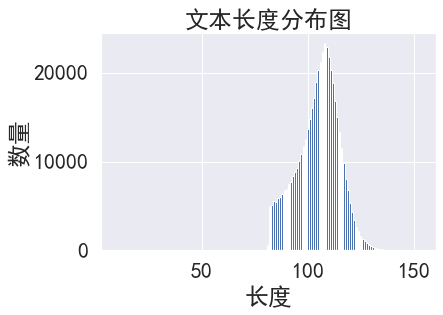

In [21]:
x1=list(former_len_dict.keys())
y1=list(former_len_dict.values())
plt.xlabel('长度')
plt.ylabel('数量')
plt.title('文本长度分布图')
plt.bar(x1,y1)

In [24]:
sorted(former_len_dict.items(), key=lambda x:x[0])

[(10, 1),
 (77, 2),
 (78, 2),
 (79, 3),
 (80, 6),
 (81, 601),
 (82, 5017),
 (83, 5158),
 (84, 5528),
 (85, 5462),
 (86, 5848),
 (87, 6039),
 (88, 6339),
 (89, 6850),
 (90, 6958),
 (91, 7442),
 (92, 7725),
 (93, 8373),
 (94, 8869),
 (95, 9325),
 (96, 10044),
 (97, 10857),
 (98, 11756),
 (99, 12590),
 (100, 13669),
 (101, 14816),
 (102, 16006),
 (103, 17195),
 (104, 19000),
 (105, 20326),
 (106, 21221),
 (107, 22341),
 (108, 23315),
 (109, 22923),
 (110, 21778),
 (111, 20288),
 (112, 18852),
 (113, 16810),
 (114, 15010),
 (115, 13277),
 (116, 11577),
 (117, 9804),
 (118, 8086),
 (119, 6763),
 (120, 5385),
 (121, 4365),
 (122, 3416),
 (123, 2684),
 (124, 2143),
 (125, 1611),
 (126, 1301),
 (127, 1075),
 (128, 801),
 (129, 644),
 (130, 441),
 (131, 381),
 (132, 287),
 (133, 238),
 (134, 165),
 (135, 142),
 (136, 85),
 (137, 76),
 (138, 67),
 (139, 47),
 (140, 48),
 (141, 41),
 (142, 1),
 (144, 1),
 (146, 2),
 (147, 1),
 (148, 1),
 (149, 4),
 (150, 1),
 (151, 1),
 (152, 2),
 (153, 1)]

### 单词个数勘察

In [49]:
vocab_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)  # 返回元组列表

In [50]:
vocab_count

[('，', 2256011),
 ('的', 1175541),
 ('。', 1087829),
 ('\n', 998620),
 ('1', 569353),
 ('0', 565820),
 ('一', 513504),
 ('人', 451420),
 ('2', 440606),
 ('国', 423967),
 ('在', 412280),
 ('中', 395829),
 ('、', 375650),
 ('“', 364230),
 ('”', 344130),
 ('日', 342661),
 ('大', 334943),
 ('不', 327612),
 ('年', 325306),
 ('是', 320972),
 ('有', 319514),
 ('上', 312859),
 ('了', 280896),
 ('为', 252641),
 ('3', 252192),
 ('发', 246660),
 ('行', 227313),
 ('5', 225712),
 ('公', 216922),
 ('市', 216294),
 ('生', 215969),
 ('出', 212099),
 ('家', 205685),
 ('时', 200280),
 ('会', 199749),
 ('4', 198605),
 ('个', 192449),
 ('：', 186361),
 ('月', 184764),
 ('业', 182043),
 ('和', 180249),
 ('地', 177503),
 ('到', 173115),
 ('将', 171358),
 ('成', 167785),
 ('.', 166760),
 ('来', 166513),
 ('新', 165790),
 ('6', 158717),
 ('被', 156617),
 ('这', 153660),
 ('前', 153395),
 ('开', 153022),
 ('多', 152237),
 ('后', 152125),
 ('美', 151839),
 ('对', 151459),
 ('8', 150899),
 ('高', 148458),
 ('子', 148123),
 ('机', 147336),
 ('下', 146385),
 ('元

In [51]:
len(vocab_count)

8478

In [131]:
def isNumOrChar(word):
    if "0"<= word <= "9" or "a" <= word <= "z" or "A" <= word <= "Z":
        return True
    return False

def isChinese(word):
    if '\u4e00' <= word <= '\u9fff':
        return True
    return False

def isPunctuation(word):  # 中文单引号，英文 引号、问号、冒号 左右括号替换
    if word in ["，", "。", "“", "”", "：", "；", "、", "？", "！", "《", "》", "（", "）", ".", "%", "…", "-", "—", "#"]:
        return True
    return False

In [96]:
minor_word = []
for wordpair in vocab_count:
    word = wordpair[0]
    if not isChinese(word):
        minor_word.append(word)
        print(word, end=" ")

， 。 
 1 0 2 、 “ ” 3 5 4 ： . 6 8 7 9 ； ？ % ！ 》 《 " P … ） （ # - O A — e ) ( i C o a I S n T · M : B E D r / G N l s t H F L h d m c u V p ~ Q R 「 K y 」 g W b k ? + X ℃ ’ ‘ ② ① U ③ w • ; ％ v f J 【 】 ④ Y ! > １ x → 　 ０ ． ２ － ⑤ Z ↓ _ ～ z ３ ⑥ ㎡ = ５ * ⑦ ４ j ６ & ８ ７ × @ ９ ] | ' [ ⑧ ＂ ❷ ❶ ❸ q \ ／ ⑨ ​ $ ❹ ° ⑩ ＋ Ａ ∶ Ｉ Ｐ < ︰ ─ ＝ ★ ‰ ❺ а ￥ ― Ⅱ ‧ ➊ ➌ Ⅳ Ⅲ Ｃ   Ｅ 〉 〈 о ➋ Ｏ и е Ｔ Ｍ ➍ н р – α 『 』 ・ ● é ﹐ Ｂ Ⅰ Ｓ Ｈ β Ｄ Ｑ к Ｆ т ＞ ｉ の ❻ ａ ➎ с Ｎ л ☞ Ⅴ Ｇ в ≥ { у ｏ д ﹕ » ｅ ❼ ⋯ √ ■ á ☆ ｎ 〔 ｝ 〇 〕 ≠ ← ь ◆ й ○ Ｌ ❽ ｜ イ ы « ≤ Ｋ з ﹑ Ｖ Ｘ ン ｐ б я è  ｍ ^ ³ ｒ ｓ п Ｒ ル ➏  ｈ ー ❾ м К ｔ ⑪ 年 г ｄ ス ¥ ヽ μ } х ∙ ＜ ó ℉ ā ≈ π à ▪ ❿ ∩ В М ＆ ÷ ラ ト ｡ ｘ ｂ ｙ ц С А ∞ ｇ ″ ↑ フ ╱ ｌ П ＿ ウ ェ ⇆ ч ム ｀ ズ ﹪ ü ` ˙ ➐ ﹒ ∪ ē ш ッ ù ′ リ ⊙ 〝 〞 ⑫ ノ Ｗ ◇ ｛ ж Р ю Ｕ ± マ ī ì ∕ ⒈ ⒉ ⒊ ⒋ △ ￣ ► É و Г Ｊ ｃ ǎ ⑴ ⑵ ア ﹔ ➑ ◎ ┏  ⑾ О Л ｖ ⒌ ⒍ Ω ﹣ ⑶ ク ん í ▲ ω ▽ щ Т ｋ 㬊 〜 パ ニ と た な い く ⑷ ⑸ ツ ィ レ タ テ か モ ァ ド ╮ ╭  利 數 度 㷧 雷 〗 ō ﹙ ﹚ ⑹ ⑺ ² ＊ ➒ ➓ う よ ￭ ︳ И Ж Д У Н ］  ｕ Ｚ Ｙ ひ ě る Ⅸ ダ カ コ り ら ナ ジ ⒎ ⒏ ️ ﹏ 李 行 金 量 〖 ╯ ╰ ß γ   ゜ ๑ ̀ ㅂ ́ ✧   ⒀ э Х Ч ф Б  ¬ ［ ｗ サ ロ 𧉆 ぶ を デ ま こ ち メ グ 

In [80]:
print(isChinese("理"))# F9E4  63972 中日韩兼容象形文字-F9e4,所以看起来是汉字，不一定在汉字的编码范围

False


### 数据清洗

In [ ]:
观察非汉字token 被字母、数字、标点 命中的情况

In [114]:
for word in minor_word:
#     print(word, word_count[word], "中文：", isChinese(word), "字符：", isNumOrChar(word), "标点：", isPunctuation(word))
    print(word, word_count[word], "命中：", isChinese(word)+isNumOrChar(word)+isPunctuation(word))

， 2256011 命中： 1
。 1087829 命中： 1

 998620 命中： 0
1 569353 命中： 1
0 565820 命中： 1
2 440606 命中： 1
、 375650 命中： 1
“ 364230 命中： 1
” 344130 命中： 1
3 252192 命中： 1
5 225712 命中： 1
4 198605 命中： 1
： 186361 命中： 1
. 166760 命中： 1
6 158717 命中： 1
8 150899 命中： 1
7 146207 命中： 1
9 140051 命中： 1
； 78656 命中： 1
？ 77002 命中： 1
% 75562 命中： 1
！ 64108 命中： 1
》 60215 命中： 1
《 60164 命中： 1
" 48290 命中： 0
P 41700 命中： 1
… 39434 命中： 1
） 36659 命中： 1
（ 36363 命中： 1
# 33251 命中： 1
- 33107 命中： 1
O 32780 命中： 1
A 30851 命中： 1
— 30536 命中： 1
e 29936 命中： 1
) 29082 命中： 0
( 28841 命中： 0
i 28633 命中： 1
C 28588 命中： 1
o 26534 命中： 1
a 26508 命中： 1
I 22323 命中： 1
S 22145 命中： 1
n 20718 命中： 1
T 19424 命中： 1
· 19306 命中： 0
M 19145 命中： 1
: 17436 命中： 0
B 17331 命中： 1
E 17157 命中： 1
D 16443 命中： 1
r 15755 命中： 1
/ 14964 命中： 0
G 14364 命中： 1
N 12987 命中： 1
l 12422 命中： 1
s 12253 命中： 1
t 12176 命中： 1
H 11566 命中： 1
F 10637 命中： 1
L 9557 命中： 1
h 9486 命中： 1
d 9067 命中： 1
m 8591 命中： 1
c 7745 命中： 1
u 7460 命中： 1
V 7403 命中： 1
p 7349 命中： 1
~ 6953 命中： 0
Q 6756 命中： 1
R 6727 命中：

In [124]:
vocab_count[5884:]  # vocab_count[:5886]  # 频数大于10的单词有5886个

[('儀', 11),
 ('珐', 10),
 ('砗', 10),
 ('磲', 10),
 ('⇆', 10),
 ('祕', 10),
 ('颦', 10),
 ('锟', 10),
 ('颉', 10),
 ('婦', 10),
 ('誤', 10),
 ('負', 10),
 ('慮', 10),
 ('轟', 10),
 ('茏', 10),
 ('铰', 10),
 ('臬', 10),
 ('ч', 10),
 ('篾', 10),
 ('莨', 10),
 ('陉', 10),
 ('蜉', 10),
 ('陣', 10),
 ('檢', 10),
 ('鬥', 10),
 ('蹤', 10),
 ('勞', 10),
 ('駕', 10),
 ('壇', 10),
 ('鄧', 10),
 ('爾', 10),
 ('傑', 10),
 ('鋒', 10),
 ('夢', 10),
 ('訓', 10),
 ('誌', 10),
 ('歐', 10),
 ('壓', 10),
 ('縣', 10),
 ('ム', 10),
 ('擢', 10),
 ('枥', 10),
 ('蛐', 10),
 ('甪', 10),
 ('｀', 10),
 ('堺', 10),
 ('簌', 10),
 ('佶', 10),
 ('馼', 10),
 ('円', 10),
 ('ズ', 10),
 ('柞', 10),
 ('宮', 10),
 ('幔', 10),
 ('佻', 10),
 ('畲', 10),
 ('痨', 10),
 ('戡', 10),
 ('靥', 10),
 ('镒', 10),
 ('谆', 10),
 ('厩', 10),
 ('槓', 10),
 ('撐', 10),
 ('饸', 10),
 ('饹', 10),
 ('鲎', 10),
 ('挹', 10),
 ('﹪', 10),
 ('ü', 10),
 ('庑', 10),
 ('蜢', 10),
 ('綑', 10),
 ('磙', 10),
 ('悫', 10),
 ('`', 10),
 ('˙', 10),
 ('鞅', 10),
 ('庖', 10),
 ('璠', 10),
 ('屐', 10),
 ('噹', 10),
 ('謙', 10),
 ('諗